In [2]:
import pandas as pd

# Read the CSV properly
data = pd.read_csv(
    r"D:\spam collection\spam data\spam.csv", 
    encoding='latin-1',
    usecols=[0, 1],                 
    names=['label', 'message'],     
    header=0,                       
    quotechar='"'                   
)

# Drop any rows with NaN just in case
data = data.dropna().reset_index(drop=True)

# Show first 5 rows
print(data.head())
print("Dataset shape:", data.shape)


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
Dataset shape: (5572, 2)


In [3]:
# Convert labels to numeric
data['label_num'] = data['label'].map({'ham': 0, 'spam': 1})
print(data.head())

  label                                            message  label_num
0   ham  Go until jurong point, crazy.. Available only ...          0
1   ham                      Ok lar... Joking wif u oni...          0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3   ham  U dun say so early hor... U c already then say...          0
4   ham  Nah I don't think he goes to usf, he lives aro...          0


In [4]:
#Model training
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    data['message'], data['label_num'], test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 4457
Testing samples: 1115


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
vectorizer = TfidfVectorizer()

# Fit on training data and transform both train and test
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)


Shape of X_train_tfidf: (4457, 7735)
Shape of X_test_tfidf: (1115, 7735)


In [6]:
from sklearn.naive_bayes import MultinomialNB


In [7]:
# Initialize the classifier
model = MultinomialNB()

# Train the model on the training data
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [8]:
# Predict labels for test data
y_pred = model.predict(X_test_tfidf)

# Show first 10 predictions
print(y_pred[:10])


[0 0 0 0 1 0 0 0 0 0]


In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9623318385650225

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115


Confusion Matrix:
 [[965   0]
 [ 42 108]]


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


C:\Users\sonal\AppData\Local\Temp\ipykernel_1156\1906120264.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="label", palette="viridis")


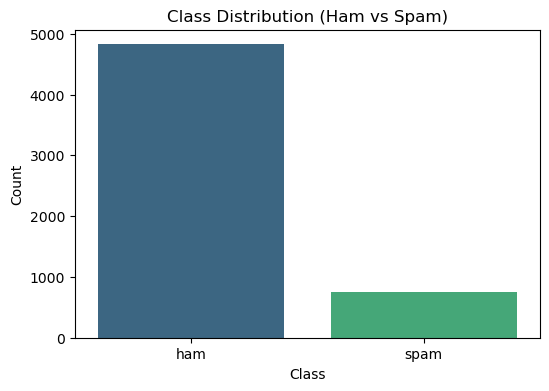

In [11]:
# 📊 1. Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(data=data, x="label", palette="viridis")
plt.title("Class Distribution (Ham vs Spam)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


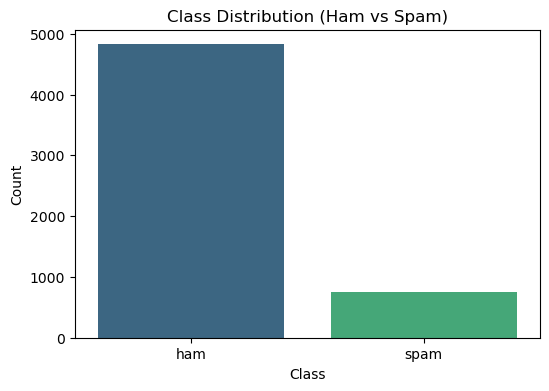

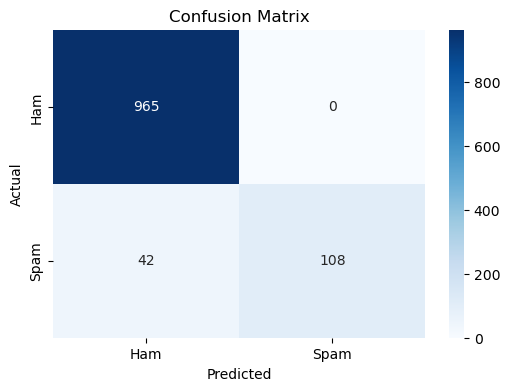

In [12]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Step 2: Load dataset (adjust path if needed)
df = pd.read_csv(
    r"D:\spam collection\spam.csv", 
    encoding='latin-1', 
    usecols=[0,1], 
    names=['label','message'], 
    header=0,
    quotechar='"'
)

# Step 3: Drop missing values
df = df.dropna().reset_index(drop=True)

# Step 4: Convert labels to numbers
df['label_num'] = df['label'].map({'ham':0, 'spam':1})

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label_num'], test_size=0.2, random_state=42)

# Step 6: Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 7: Train model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Step 8: Predictions
y_pred = model.predict(X_test_tfidf)

# ✅ Plot 1: Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='viridis', hue='label', dodge=False, legend=False)
plt.title("Class Distribution (Ham vs Spam)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# ✅ Plot 2: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show() 


In [13]:
# ✅ Test custom SMS messages
while True:
    msg = input("\nType an SMS (or 'exit' to quit): ")
    if msg.lower() == 'exit':
        break
    # Convert to TF-IDF
    msg_tfidf = vectorizer.transform([msg])
    # Predict
    pred = model.predict(msg_tfidf)[0]
    if pred == 0:
        print("Prediction: HAM ✅")
    else:
        print("Prediction: SPAM ⚠️")



Type an SMS (or 'exit' to quit):  click the link to know more


Prediction: HAM ✅



Type an SMS (or 'exit' to quit):  you won a lottery!


Prediction: HAM ✅



Type an SMS (or 'exit' to quit):  you are selected for the next round!


Prediction: HAM ✅



Type an SMS (or 'exit' to quit):  we have hit 100 million


Prediction: HAM ✅



Type an SMS (or 'exit' to quit):  sorry, I'll call later


Prediction: HAM ✅



Type an SMS (or 'exit' to quit):  claim prize!


Prediction: SPAM ⚠️



Type an SMS (or 'exit' to quit):  gift cards


Prediction: HAM ✅



Type an SMS (or 'exit' to quit):  we have a giveaway


Prediction: HAM ✅



Type an SMS (or 'exit' to quit):  verify account


Prediction: HAM ✅



Type an SMS (or 'exit' to quit):  free trail


Prediction: HAM ✅



Type an SMS (or 'exit' to quit):  exit
